In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('DataSetforRFM.csv')
df.head(5)

,Row Labels,Max of Order Date,Count of Order ID,Average of Sales
0,AA-10315,3/3/2021,4.0,1101.51750
1,AA-10375,10/7/2021,4.0,132.57250
2,AA-10480,0,10.0,174.75000
3,AA-10645,4/9/2021,8.0,208.52375
4,AB-10015,10/11/2021,2.0,281.97000


In [ ]:
df.dtypes

Row Labels            object
Max of Order Date     object
Count of Order ID    float64
Average of Sales     float64
dtype: object

In [ ]:
# # Finding out each customer RFM Values

# Convert "Max of Order Date" to datetime format
df["Max of Order Date"] = pd.to_datetime(df["Max of Order Date"], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=["Max of Order Date"])

# Calculate recency (R)
# NOte that Cutomer Id is Row Label
current_date = pd.to_datetime('today').date()
df['Recency'] = df.groupby('Row Labels')['Max of Order Date'].transform(lambda x: (current_date - x.max().date()).days)
R = df.groupby('Row Labels')['Recency'].max()
R

Row Labels
AA-10315    1039
AA-10375     821
AA-10645    1002
AB-10015     817
AB-10060    1092
            ... 
WB-21850     785
XP-21865    1031
YC-21895     916
ZC-21910     885
ZD-21925     882
Name: Recency, Length: 372, dtype: int64

In [ ]:
#Frequency

F = df.groupby(['Row Labels'])['Count of Order ID'].sum()
F

Row Labels
AA-10315     4.0
AA-10375     4.0
AA-10645     8.0
AB-10015     2.0
AB-10060     9.0
            ... 
WB-21850    16.0
XP-21865     9.0
YC-21895     3.0
ZC-21910     9.0
ZD-21925     5.0
Name: Count of Order ID, Length: 372, dtype: float64

In [ ]:
# monetarty

M = df.groupby(['Row Labels'])['Average of Sales'].sum()
M

Row Labels
AA-10315    1101.517500
AA-10375     132.572500
AA-10645     208.523750
AB-10015     281.970000
AB-10060     533.424444
               ...     
WB-21850     130.906250
XP-21865      90.708889
YC-21895     523.826667
ZC-21910     357.303333
ZD-21925     237.548000
Name: Average of Sales, Length: 372, dtype: float64

In [ ]:
RFM = pd.concat([R,F,M],axis = 1)
RFM.rename(columns={
    'Recency': 'R',
    'Count of Order ID': 'F',
    'Average of Sales': 'M'
}, inplace=True)
RFM

,R,F,M
Row Labels,,,
AA-10315,1039,4.0,1101.517500
AA-10375,821,4.0,132.572500
AA-10645,1002,8.0,208.523750
AB-10015,817,2.0,281.970000
AB-10060,1092,9.0,533.424444
...,...,...,...
WB-21850,785,16.0,130.906250
XP-21865,1031,9.0,90.708889
YC-21895,916,3.0,523.826667


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(RFM)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

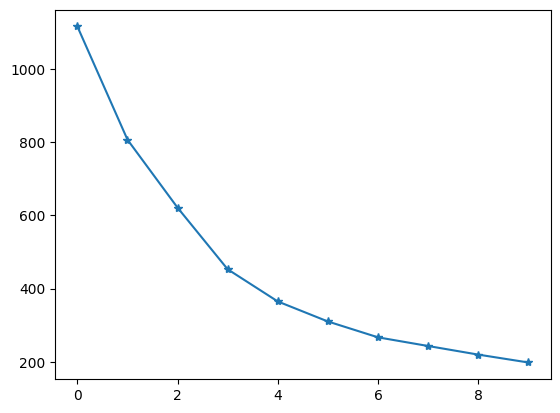

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for i in np.arange(1,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled)
  inertia.append(kmeans.inertia_)

plt.plot(inertia,marker = '*')

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled)
RFM["Clustered"] = (kmeans.labels_ +1)  //+1 is because 0 pani lincha Python le

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
RFM

,R,F,M,Clustered
Row Labels,,,,
AA-10315,1039,4.0,1101.517500,1
AA-10375,821,4.0,132.572500,2
AA-10645,1002,8.0,208.523750,3
AB-10015,817,2.0,281.970000,2
AB-10060,1092,9.0,533.424444,3
...,...,...,...,...
WB-21850,785,16.0,130.906250,2
XP-21865,1031,9.0,90.708889,3
YC-21895,916,3.0,523.826667,3


In [ ]:
group = RFM.groupby(["Clustered"])["R","F","M"].mean()
group

<ipython-input-91-c64c6ea33eaf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = RFM.groupby(["Clustered"])["R","F","M"].mean()


,R,F,M
Clustered,,,
1,932.692308,3.000000,1163.976678
2,824.394595,6.356757,196.207615
3,994.739130,3.447205,167.199189


In [ ]:
def func(row):
  if row["Clusters"] == 1;  // this way we will say IRON RUST Diamond And label Customer
